In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.DataFrame(np.array([[3,69,1],[0,69,1],[1,67,0],[3,69,0],[2,66,2],[3,67,2],[2,67,3],[0,66,3],[1,67,4],[0,72,4]]))
data.columns = ['Player_#','Score','Tournament']

In [3]:
data.sort_values('Tournament')

,Player_#,Score,Tournament
2,1,67,0
3,3,69,0
0,3,69,1
1,0,69,1
4,2,66,2
5,3,67,2
6,2,67,3
7,0,66,3
8,1,67,4
9,0,72,4


In [4]:
n_players = len(pd.unique(data['Player_#']))
n_tournaments = len(pd.unique(data.Tournament))

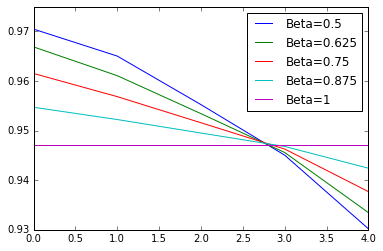

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

for beta in np.linspace(.5,1,5):
    rat = run(beta)
    plt.plot(range(n_tournaments),[(rat).tolist()[u][0]/(rat).tolist()[u+1][0] for u in range(0,n_tournaments*n_players,n_players)],label='Beta=%g'%beta)
plt.legend();
plt.savefig('different_betas.png')

In [34]:
def alpha(A,a):
    wq,vq=np.linalg.eig(A)
    return a/np.amax(np.absolute(wq))

In [46]:
def run(BETA):
    a = .8
    A = np.zeros((n_players*n_tournaments,n_players*n_tournaments))
    G = np.zeros((n_players*n_tournaments,n_players*n_tournaments))
    for tournament in pd.unique(data.Tournament):
        subset = data[data.Tournament==tournament].sort_values('Score')
        for u,player in enumerate(pd.unique(subset['Player_#'])):
            arr = np.zeros(n_players)
            arr1 = np.zeros(n_players)
            arr[pd.unique(subset['Player_#'])] = subset.Score.values / subset[subset['Player_#']==player].Score.values.astype(float)
            arr[pd.unique(subset['Player_#'])[u]] = 0
            arr1[pd.unique(subset['Player_#'])] = 1
            arr1[pd.unique(subset['Player_#'])[u]] = 0
            A[player + n_players*tournament,n_players*tournament:n_players*(tournament+1)] += arr
            G[player + n_players*tournament,n_players*tournament:n_players*(tournament+1)] += arr1
            for tournament2 in pd.unique(data.Tournament):
                if tournament==tournament2:
                    continue
                else:
                    A[player + n_players*tournament2,n_players*tournament:n_players*(tournament+1)] += BETA**(abs(tournament-tournament2)) * arr
                    G[player + n_players*tournament2,n_players*tournament:n_players*(tournament+1)] += BETA**(abs(tournament-tournament2)) * arr1
    w_a = (np.linalg.inv(np.eye(n_players*n_tournaments) - alpha(A,a)*A) * np.matrix(A).sum(1)).sum(1)
    w_g = (np.linalg.inv(np.eye(n_players*n_tournaments) - alpha(G,a)*G) * np.matrix(G).sum(1)).sum(1)
    return w_a/w_g

In [47]:
print run(.94)

[[ 0.98840222]
 [ 1.03953954]
 [ 0.99109833]
 [ 0.98985298]
 [ 0.98840222]
 [ 1.0408275 ]
 [ 0.99109833]
 [ 0.98945316]
 [ 0.98825382]
 [ 1.04212625]
 [ 0.99109833]
 [ 0.98900398]
 [ 0.98810923]
 [ 1.04342592]
 [ 0.99015392]
 [ 0.98900398]
 [ 0.98714041]
 [ 1.0447166 ]
 [ 0.99015392]
 [ 0.98900398]]
